In [1]:
#!pip install nltk
#!pip install autocorrector
#!pip install wordcloud

In [9]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
import pandas as pd
from autocorrect import Speller
from wordcloud import WordCloud
import matplotlib.pyplot as plt
spell=Speller()
from tqdm import tqdm
import re

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Sumidha
[nltk_data]     KP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
data= pd.read_csv(r'spam_mail.csv')

In [43]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [44]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize spam words


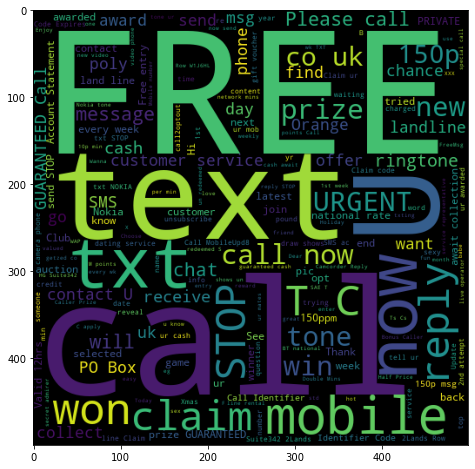

In [45]:
spam_words= ' '.join(list(data[data['Category']=='spam']['Message']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()


# Lets Visualize the Not spam words 

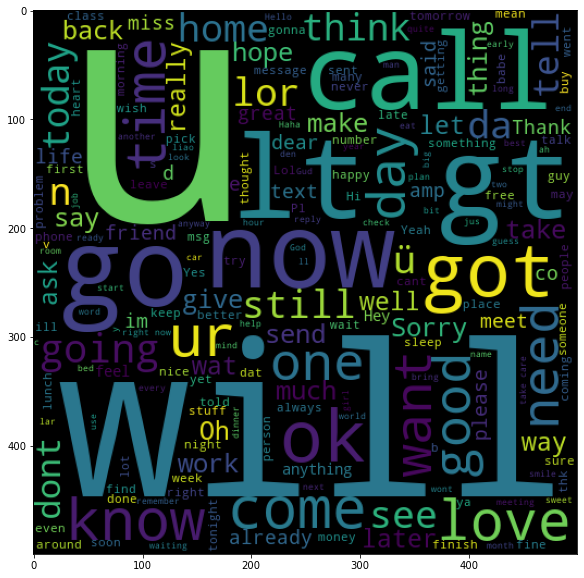

In [46]:
spam_words=''.join(list(data[data['Category']=='ham']['Message']))
spam_wc=WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

# Preprocession the data

In [56]:
data['Category']=data['Category'].apply(lambda x:1 if x=='spam' else 0)

In [55]:
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Sumidha
[nltk_data]     KP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:

new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    lines= re.sub('[^A-Za-z]',' ',lines)
    lines=lines.lower()
    
    tokenized_lines=word_tokenize(lines)
    
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    


100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [03:01<00:00, 30.77it/s]


In [13]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [60]:
processed_lines

['roll', 'true', 'name']

In [61]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [62]:
lines

'rofl  its true to its name'

In [57]:
y=data['Category']
y

0       0
1       0
2       0
3       0
4       0
       ..
5567    0
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64

In [58]:
len(new_data)

5572

 # Train and Test

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(new_data,y,test_size=0.25)

In [18]:
x_train

['remind get pound free call credit detail great offer pl reply text valid name house postcode',
 'free game get layman golf free game arcade st get ur game set reply post save active press key arcade termsappli',
 'let know need any els salad desert some mani beer shall get',
 'gr see message r u lead contract dear school wat r ur plan',
 'dunno lei decide lor abt leon top tot ben go n msg',
 'lift hope offer money need respect end month approach hurt studi anyway gr weekend',
 'great hope like man well endo lt gt inch',
 'oki go yan jiu skip ard oso go cine den go mrt one blah blah blah',
 'cool text read',
 'nice nice work',
 'think actual talk call boss more went place last year told could go get car fix cheaper kept tell today much hope would come back away regret get number etc',
 'ho ho big belli laugh see ya tomo',
 'wait call sir',
 'thank yesterday sir wonder hope enjoy burial mojibiola',
 'check room before active',
 'yeah probably sure ill let u know person wouldnt bother u

In [59]:
len(x_train)

4179

In [68]:
len(y_train)

4179

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
matrix=CountVectorizer()


In [69]:
#x_train_vector=matrix.fit_transform(x_train).toarray()
#x_test_vector=matrix.fit_transform(x_test).toarray()

x_train_vector=matrix.fit_transform(x_train).toarray()
x_test_vector=matrix.transform(x_test).toarray()

In [70]:
x_train_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
x_test_vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
y_train

5566    spam
4725    spam
3786     ham
3770     ham
3296     ham
        ... 
5261     ham
5161     ham
2588     ham
1205    spam
3742    spam
Name: Category, Length: 4179, dtype: object

In [73]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [74]:
y_test

426      ham
2822     ham
3059    spam
5532     ham
1589     ham
        ... 
1011     ham
5205    spam
1090     ham
509      ham
5474     ham
Name: Category, Length: 1393, dtype: object

# train model

In [75]:
#!pip install scikit-learn
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [76]:
model.fit(x_train_vector, y_train)

GaussianNB()

In [77]:
model.class_count_

array([3619.,  560.])

In [78]:
y_pred=model.predict(x_test_vector)

In [79]:
y_pred

array(['spam', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
accuracy_score(y_test, y_pred)*100

85.35534816941852

In [82]:
confusion_matrix(y_test,y_pred)

array([[1018,  188],
       [  16,  171]], dtype=int64)